In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

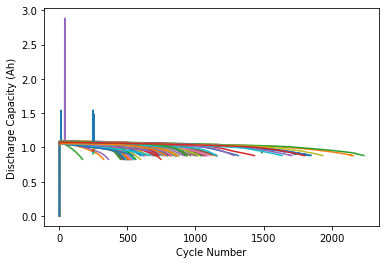

In [2]:
#LoadBatch

batch1 = pickle.load(open(r'C:\Users\satsin\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']
numBat1 = len(batch1.keys())
batch2 = pickle.load(open(r'C:\Users\satsin\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482]
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']
numBat2 = len(batch2.keys())
batch3 = pickle.load(open(r'C:\Users\satsin\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']
numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1, **batch2, **batch3}
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

#Batch_1 = pd.DataFrame(data=batch1)
#Batch_1.to_excel('summary1.xlsx')
#Batch_2 = pd.DataFrame(data=batch2)
#Batch_2.to_excel('summary2.xlsx')
#Batch_3 = pd.DataFrame(data=batch3)
#Batch_3.to_excel('summary3.xlsx')

test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat)

In [3]:
test_ind

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

In [4]:
train_ind

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

In [5]:
secondary_test_ind

array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

In [6]:
df = pd.DataFrame(bat_dict)

In [7]:
df.head()

,b1c0,b1c1,b1c2,b1c3,b1c4,b1c5,b1c6,b1c7,b1c9,b1c11,...,b3c33,b3c34,b3c35,b3c36,b3c38,b3c39,b3c40,b3c41,b3c44,b3c45
cycle_life,[[1852.0]],[[2160.0]],[[2237.0]],[[1434.0]],[[1709.0]],[[1074.0]],[[636.0]],[[870.0]],[[1054.0]],[[788.0]],...,[[1284.0]],[[1158.0]],[[1093.0]],[[923.0]],[[1935.0]],[[1156.0]],[[796.0]],[[786.0]],[[940.0]],[[1801.0]]
charge_policy,3.6C(80%)-3.6C,3.6C(80%)-3.6C,3.6C(80%)-3.6C,4C(80%)-4C,4C(80%)-4C,4.4C(80%)-4.4C,4.8C(80%)-4.8C,4.8C(80%)-4.8C,5.4C(40%)-3.6C,5.4C(50%)-3C,...,5C(67%)-4C-newstructure,5.3C(54%)-4C-newstructure,5.6C(19%)-4.6C-newstructure,5.6C(36%)-4.3C-newstructure,5C(67%)-4C-newstructure,5.3C(54%)-4C-newstructure,5.6C(19%)-4.6C-newstructure,5.6C(36%)-4.3C-newstructure,5.3C(54%)-4C-newstructure,4.8C(80%)-4.8C-newstructure
summary,"{'IR': [0.0, 0.016742354, 0.016724309, 0.01668...","{'IR': [0.0, 0.017038831, 0.017009802, 0.01692...","{'IR': [0.0, 0.01686798, 0.016831938, 0.016718...","{'IR': [0.0, 0.016369704, 0.016315572, 0.01632...","{'IR': [0.0, 0.016787428, 0.016740341, 0.01673...","{'IR': [0.0, 0.016437579, 0.016396422, 0.01636...","{'IR': [0.0, 0.017001977, 0.016977131, 0.01693...","{'IR': [0.0, 0.016311171, 0.016267659, 0.01623...","{'IR': [0.0, 0.016978227, 0.01692898, 0.016933...","{'IR': [0.0, 0.016575078, 0.016582273, 0.01658...",...,"{'IR': [0.015608473, 0.015511206, 0.015512635,...","{'IR': [0.01546871, 0.015438841, 0.015394062, ...","{'IR': [0.015503207, 0.01549053, 0.015479395, ...","{'IR': [0.015283138, 0.015267849, 0.015275053,...","{'IR': [0.016009804, 0.015988033, 0.015961975,...","{'IR': [0.015740374, 0.015740704, 0.015716039,...","{'IR': [0.015553804, 0.015561919, 0.015549388,...","{'IR': [0.018552294, 0.01854171, 0.018510165, ...","{'IR': [0.015744392, 0.015722955, 0.015682839,...","{'IR': [0.015778109, 0.015742011, 0.015711647,..."
cycles,"{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...",...,"{'0': {'I': [0.4446896636363636, 0.74768759999...","{'0': {'I': [0.36538210909090907, 0.6768590727...","{'0': {'I': [0.28115359090909087, 0.6164724181...","{'0': {'I': [0.33352591818181815, 0.7284268454...","{'0': {'I': [0.2911827818181818, 0.54510636363...","{'0': {'I': [0.42202342727272724, 0.5800594, 0...","{'0': {'I': [0.2727786, 0.6122276999999999, 0....","{'0': {'I': [0.3870253090909091, 0.72554848181...","{'0': {'I': [0.4198421090909091, 0.68663163636...","{'0': {'I': [0.5633510272727271, 0.82326021818..."


In [81]:
Count = pd.DataFrame(df1.groupby(['charge_policy']).count())

In [82]:
Count

,cycle_life,summary,cycles
charge_policy,,,
1C(4%)-6C,1,1,1
2C(10%)-6C,1,1,1
2C(2%)-5C,1,1,1
2C(7%)-5.5C,1,1,1
3.6C(2%)-4.85C,1,1,1
...,...,...,...
7C(40%)-3.6C,2,2,2
7C(40%)-3C,2,2,2
8C(15%)-3.6C,2,2,2


In [83]:
Count.to_csv('C:\\Users\\satsin\\Desktop\\Battery life\\cell_count.csv')

In [130]:
#Extract the last value of Qdlin for each cycle of every cell:
cell_no = input("Enter the cell no.:")
#Index = int(input("Enter the index value:"))
df1 = df.transpose()
df2 = pd.DataFrame(df1['cycles'][cell_no])
df3 = df2.transpose()
qdlin= pd.DataFrame(df3['Qdlin'])
qdlin_1 = qdlin.transpose()
qdlin_2 = []
for col in qdlin_1:
    qdlin_2.append(qdlin_1[col][0][-1])
    qdlin_final = pd.DataFrame(qdlin_2,columns = ['Qdlin'])

Enter the cell no.:b3c0


In [131]:
qdlin_final

,Qdlin
0,1.051990
1,1.052644
2,1.053546
3,1.053975
4,1.054291
...,...
1003,0.811298
1004,0.809750
1005,0.808129
1006,0.806670


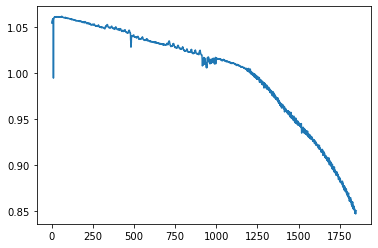

In [129]:
#b1c0
plt.plot(qdlin_final[1:])

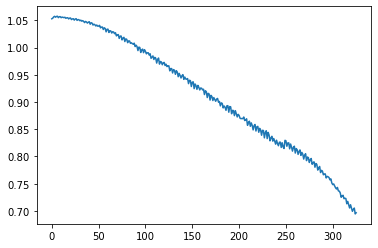

In [122]:
#b2c0
plt.plot(qdlin_final)

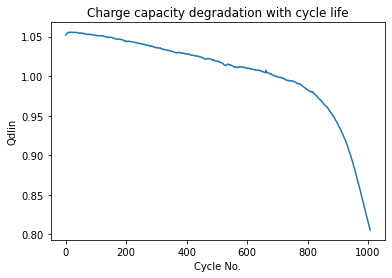

In [133]:
#b3c0
plt.plot(qdlin_final)
plt.xlabel('Cycle No.')
plt.ylabel('Qdlin')
plt.title('Charge capacity degradation with cycle life')
plt.show()

In [5]:
#Function to extract data cycle wise for each cell
#insert the cell no and cycle number to extract the data
#cell no varies from b1c0 to b3c43 and cycle number varies from 0 to 2300
def cycle(df):
    import pandas as pd
    cell_no = input("Enter the cell no.:")
    Index = int(input("Enter the index value:"))
    df1 = df.transpose()
    df2 = pd.DataFrame(df1['cycles'][cell_no])
    df3 = df2.transpose()
    df4 = pd.DataFrame()#df3['I'][Index],columns= ['I'])
    for i in list(df3):
        df5 = pd.DataFrame(df3[i][Index],columns = [i])
        df6 = df4.transpose()
        df7 = df6.append(df5.transpose())
        df4 = df7.transpose()
        df4.to_csv('C:\\Users\\satsin\\Desktop\\Battery life\\Cycle_'+str(cell_no)+'_'+str(Index)+'.csv')
    return(df4.shape)

In [8]:
cycle(df)

NameError: name 'cycle' is not defined

In [8]:
df1 = df.transpose()

In [9]:
df1.head()

,cycle_life,charge_policy,summary,cycles
b1c0,[[1852.0]],3.6C(80%)-3.6C,"{'IR': [0.0, 0.016742354, 0.016724309, 0.01668...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."
b1c1,[[2160.0]],3.6C(80%)-3.6C,"{'IR': [0.0, 0.017038831, 0.017009802, 0.01692...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."
b1c2,[[2237.0]],3.6C(80%)-3.6C,"{'IR': [0.0, 0.01686798, 0.016831938, 0.016718...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."
b1c3,[[1434.0]],4C(80%)-4C,"{'IR': [0.0, 0.016369704, 0.016315572, 0.01632...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."
b1c4,[[1709.0]],4C(80%)-4C,"{'IR': [0.0, 0.016787428, 0.016740341, 0.01673...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."


In [10]:
train = df1.iloc[train_ind, :]

In [11]:
train.head()

,cycle_life,charge_policy,summary,cycles
b1c1,[[2160.0]],3.6C(80%)-3.6C,"{'IR': [0.0, 0.017038831, 0.017009802, 0.01692...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."
b1c3,[[1434.0]],4C(80%)-4C,"{'IR': [0.0, 0.016369704, 0.016315572, 0.01632...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."
b1c5,[[1074.0]],4.4C(80%)-4.4C,"{'IR': [0.0, 0.016437579, 0.016396422, 0.01636...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."
b1c7,[[870.0]],4.8C(80%)-4.8C,"{'IR': [0.0, 0.016311171, 0.016267659, 0.01623...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."
b1c11,[[788.0]],5.4C(50%)-3C,"{'IR': [0.0, 0.016575078, 0.016582273, 0.01658...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."


In [12]:
train.tail()

,cycle_life,charge_policy,summary,cycles
b2c37,[[478.0]],5.6C(38%)-4.25C,"{'IR': [0.018337425, 0.018226312, 0.018163333,...","{'0': {'I': [0.0, 0.3910342090909091, 0.558263..."
b2c39,[[459.0]],5.6C(58%)-3.5C,"{'IR': [0.018178858, 0.018174672, 0.018061638,...","{'0': {'I': [0.0, 0.49707932727272724, 0.66572..."
b2c41,[[429.0]],5.6C(65%)-3C,"{'IR': [0.017931128, 0.0179385, 0.017922211, 0...","{'0': {'I': [0.0, 0.31128623636363634, 0.55942..."
b2c43,[[462.0]],6C(31%)-4.25C,"{'IR': [0.018279195, 0.01812768, 0.018153407, ...","{'0': {'I': [0.0, 0.4190895818181818, 0.661905..."
b2c45,[[487.0]],6C(4%)-4.75C,"{'IR': [0.017350584, 0.017153347, 0.017201968,...","{'0': {'I': [0.0, 0.3656976909090909, 0.548508..."


In [13]:
train_1 = train.transpose()

In [14]:
test = df1.iloc[test_ind, :]

In [15]:
test.head()

,cycle_life,charge_policy,summary,cycles
b1c0,[[1852.0]],3.6C(80%)-3.6C,"{'IR': [0.0, 0.016742354, 0.016724309, 0.01668...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."
b1c2,[[2237.0]],3.6C(80%)-3.6C,"{'IR': [0.0, 0.01686798, 0.016831938, 0.016718...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."
b1c4,[[1709.0]],4C(80%)-4C,"{'IR': [0.0, 0.016787428, 0.016740341, 0.01673...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."
b1c6,[[636.0]],4.8C(80%)-4.8C,"{'IR': [0.0, 0.017001977, 0.016977131, 0.01693...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."
b1c9,[[1054.0]],5.4C(40%)-3.6C,"{'IR': [0.0, 0.016978227, 0.01692898, 0.016933...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]..."


In [16]:
test_1 = test.transpose()

In [17]:
Qdlin1_list = list()
Cycle_list = list()
final_df = pd.DataFrame()
for i in list(test_1):
    b2c22 = pd.DataFrame(test_1[i])
    b2c22_1 = b2c22.transpose()
    b2c22_2 = pd.DataFrame.from_dict({(j,k): b2c22_1['cycles'][j][k] 
                       for j in b2c22_1['cycles'].keys() 
                       for k in b2c22_1['cycles'][i].keys()},
                   orient='index')
    Qdlin = b2c22_2['Qdlin'][100]-b2c22_2['Qdlin'][10]
    Qdlin1_list.append('%.12f'%(np.var(Qdlin)))
    print('**********************',b2c22_1['cycle_life'].str.split())
    Cycle_list.append(b2c22_1['cycle_life'])
# my_df['Cycle'] = Cycle
# final_df['Cycle'] = Cycle
    #Cycle['Variance'] = np.var(Qdlin1)
#     print(Cycle,np.var(Qdlin1))#,np.mean(Qdlin1))
final_df['Cycle'] = Cycle_list
final_df['Qdlin1'] = Qdlin1_list
# print('Cycle_list',Cycle_list)
#print(Cycle,'%.12f'%variance)

********************** b1c0   NaN
Name: cycle_life, dtype: float64
********************** b1c2   NaN
Name: cycle_life, dtype: float64
********************** b1c4   NaN
Name: cycle_life, dtype: float64
********************** b1c6   NaN
Name: cycle_life, dtype: float64
********************** b1c9   NaN
Name: cycle_life, dtype: float64
********************** b1c14   NaN
Name: cycle_life, dtype: float64
********************** b1c16   NaN
Name: cycle_life, dtype: float64
********************** b1c18   NaN
Name: cycle_life, dtype: float64
********************** b1c20   NaN
Name: cycle_life, dtype: float64
********************** b1c23   NaN
Name: cycle_life, dtype: float64
********************** b1c25   NaN
Name: cycle_life, dtype: float64
********************** b1c27   NaN
Name: cycle_life, dtype: float64
********************** b1c29   NaN
Name: cycle_life, dtype: float64
********************** b1c31   NaN
Name: cycle_life, dtype: float64
********************** b1c33   NaN
Name: cycle_life, 

In [18]:
final_df

,Cycle,Qdlin1
0,"b1c0 [[1852.0]] Name: cycle_life, dtype: ob...",0.000008881238
1,"b1c2 [[2237.0]] Name: cycle_life, dtype: ob...",0.000011171649
2,"b1c4 [[1709.0]] Name: cycle_life, dtype: ob...",0.000024843956
3,"b1c6 [[636.0]] Name: cycle_life, dtype: object",0.000169323446
4,"b1c9 [[1054.0]] Name: cycle_life, dtype: ob...",0.000105040126
5,"b1c14 [[880.0]] Name: cycle_life, dtype: ob...",0.000089384273
6,"b1c16 [[862.0]] Name: cycle_life, dtype: ob...",0.000079142304
7,"b1c18 [[691.0]] Name: cycle_life, dtype: ob...",0.000216769543
8,"b1c20 [[534.0]] Name: cycle_life, dtype: ob...",0.000433004959
9,"b1c23 [[1014.0]] Name: cycle_life, dtype: o...",0.000093397223


In [19]:
Qdlin1_list = list()
Cycle_list = list()
final_df = pd.DataFrame()
for i in list(train_1):
    b2c22 = pd.DataFrame(train_1[i])
    b2c22_1 = b2c22.transpose()
    b2c22_2 = pd.DataFrame.from_dict({(j,k): b2c22_1['cycles'][j][k] 
                       for j in b2c22_1['cycles'].keys() 
                       for k in b2c22_1['cycles'][i].keys()},
                   orient='index')
    Qdlin = b2c22_2['Qdlin'][100]-b2c22_2['Qdlin'][10]
    Qdlin1_list.append('%.12f'%(np.var(Qdlin)))
    print('**********************',b2c22_1['cycle_life'].str.split())
    Cycle_list.append(b2c22_1['cycle_life'])
# my_df['Cycle'] = Cycle
# final_df['Cycle'] = Cycle
    #Cycle['Variance'] = np.var(Qdlin1)
#     print(Cycle,np.var(Qdlin1))#,np.mean(Qdlin1))
final_df['Cycle'] = Cycle_list
final_df['Qdlin1'] = Qdlin1_list
# print('Cycle_list',Cycle_list)

********************** b1c1   NaN
Name: cycle_life, dtype: float64
********************** b1c3   NaN
Name: cycle_life, dtype: float64
********************** b1c5   NaN
Name: cycle_life, dtype: float64
********************** b1c7   NaN
Name: cycle_life, dtype: float64
********************** b1c11   NaN
Name: cycle_life, dtype: float64
********************** b1c15   NaN
Name: cycle_life, dtype: float64
********************** b1c17   NaN
Name: cycle_life, dtype: float64
********************** b1c19   NaN
Name: cycle_life, dtype: float64
********************** b1c21   NaN
Name: cycle_life, dtype: float64
********************** b1c24   NaN
Name: cycle_life, dtype: float64
********************** b1c26   NaN
Name: cycle_life, dtype: float64
********************** b1c28   NaN
Name: cycle_life, dtype: float64
********************** b1c30   NaN
Name: cycle_life, dtype: float64
********************** b1c32   NaN
Name: cycle_life, dtype: float64
********************** b1c34   NaN
Name: cycle_life,

In [20]:
final_df

,Cycle,Qdlin1
0,"b1c1 [[2160.0]] Name: cycle_life, dtype: ob...",0.000007315160
1,"b1c3 [[1434.0]] Name: cycle_life, dtype: ob...",0.000041082068
2,"b1c5 [[1074.0]] Name: cycle_life, dtype: ob...",0.000069850239
3,"b1c7 [[870.0]] Name: cycle_life, dtype: object",0.000150718170
4,"b1c11 [[788.0]] Name: cycle_life, dtype: ob...",0.000079602825
5,"b1c15 [[719.0]] Name: cycle_life, dtype: ob...",0.000094369664
6,"b1c17 [[857.0]] Name: cycle_life, dtype: ob...",0.000100642610
7,"b1c19 [[788.0]] Name: cycle_life, dtype: ob...",0.000232075804
8,"b1c21 [[559.0]] Name: cycle_life, dtype: ob...",0.000454676786
9,"b1c24 [[1017.0]] Name: cycle_life, dtype: o...",0.000118827872


In [21]:
test_sec = df1.iloc[secondary_test_ind, :]
test_sec_1 = test_sec.transpose()

In [22]:
Qdlin1_list = list()
Cycle_list = list()
final_df = pd.DataFrame()
for i in list(test_sec_1):
    b2c22 = pd.DataFrame(test_sec_1[i])
    b2c22_1 = b2c22.transpose()
    b2c22_2 = pd.DataFrame.from_dict({(j,k): b2c22_1['cycles'][j][k] 
                       for j in b2c22_1['cycles'].keys() 
                       for k in b2c22_1['cycles'][i].keys()},
                   orient='index')
    Qdlin = b2c22_2['Qdlin'][100]-b2c22_2['Qdlin'][10]
    Qdlin1_list.append('%.12f'%(np.var(Qdlin)))
    print('**********************',b2c22_1['cycle_life'].str.split())
    Cycle_list.append(b2c22_1['cycle_life'])
# my_df['Cycle'] = Cycle
# final_df['Cycle'] = Cycle
    #Cycle['Variance'] = np.var(Qdlin1)
#     print(Cycle,np.var(Qdlin1))#,np.mean(Qdlin1))
final_df['Cycle'] = Cycle_list
final_df['Qdlin1'] = Qdlin1_list
# print('Cycle_list',Cycle_list)

********************** b3c0   NaN
Name: cycle_life, dtype: float64
********************** b3c1   NaN
Name: cycle_life, dtype: float64
********************** b3c3   NaN
Name: cycle_life, dtype: float64
********************** b3c4   NaN
Name: cycle_life, dtype: float64
********************** b3c5   NaN
Name: cycle_life, dtype: float64
********************** b3c6   NaN
Name: cycle_life, dtype: float64
********************** b3c7   NaN
Name: cycle_life, dtype: float64
********************** b3c8   NaN
Name: cycle_life, dtype: float64
********************** b3c9   NaN
Name: cycle_life, dtype: float64
********************** b3c10   NaN
Name: cycle_life, dtype: float64
********************** b3c11   NaN
Name: cycle_life, dtype: float64
********************** b3c12   NaN
Name: cycle_life, dtype: float64
********************** b3c13   NaN
Name: cycle_life, dtype: float64
********************** b3c14   NaN
Name: cycle_life, dtype: float64
********************** b3c15   NaN
Name: cycle_life, dtyp

In [23]:
final_df

,Cycle,Qdlin1
0,"b3c0 [[1009.0]] Name: cycle_life, dtype: ob...",0.000058523102
1,"b3c1 [[1063.0]] Name: cycle_life, dtype: ob...",0.000056415073
2,"b3c3 [[1115.0]] Name: cycle_life, dtype: ob...",0.000075936232
3,"b3c4 [[1048.0]] Name: cycle_life, dtype: ob...",0.000064404036
4,"b3c5 [[828.0]] Name: cycle_life, dtype: object",0.000080063982
5,"b3c6 [[667.0]] Name: cycle_life, dtype: object",0.000304515050
6,"b3c7 [[1836.0]] Name: cycle_life, dtype: ob...",0.000032552038
7,"b3c8 [[828.0]] Name: cycle_life, dtype: object",0.000077688967
8,"b3c9 [[1039.0]] Name: cycle_life, dtype: ob...",0.000101401035
9,"b3c10 [[1078.0]] Name: cycle_life, dtype: o...",0.000038911269


In [25]:
#Function to extract data cycle wise for each cell
#insert the cell no and cycle number to extract the data
#cell no varies from b1c0 to b3c43 and cycle number varies from 0 to 2300
def cycle(df):
    import pandas as pd
    cell_no = input("Enter the cell no.:")
    Index = int(input("Enter the index value:"))
    df1 = df.transpose()
    df2 = pd.DataFrame(df1['cycles'][cell_no])
    df3 = df2.transpose()
    df4 = pd.DataFrame()#df3['I'][Index],columns= ['I'])
    for i in list(df3):
        df5 = pd.DataFrame(df3[i][Index],columns = [i])
        df6 = df4.transpose()
        df7 = df6.append(df5.transpose())
        df4 = df7.transpose()
        df4.to_csv('C:\\Users\\satsin\\Desktop\\Battery life\\Cycle_'+str(cell_no)+'_'+str(Index)+'.csv')
    return(df4.shape)

In [ ]:
cycle(train)

In [ ]:
#function to extract all the data for different batches in different sheet cell wise for summary data
#Create one excel file in the shared location to save all the records and run the script in append mode,'a'
def summary(df):
    for i in list(df):
        cell = pd.DataFrame(df[i])
        cell_1 = cell.transpose()
        df3 = pd.DataFrame(cell_1['summary'][i])
        s_name = 'C:\\Users\\satsin\\Desktop\\Battery life\\summary_batch2.xlsx'
        with pd.ExcelWriter(s_name,engine="openpyxl",mode='a') as writer:
            d_name='Sheet_'+str(i)
            df3.to_excel(writer, sheet_name=d_name)
    return df3.shape

In [ ]:
summary(df)

In [ ]:
#function to extract all the data for different batches in different sheet cell wise for cycle data
#Create one excel file in the shared location to save all the records and run the script in append mode,'a'

def cycle_1(df):
    for i in list(df):
        cell = pd.DataFrame(df[i])
        cell_1 = cell.transpose()
        cell_2 = pd.DataFrame.from_dict({(j,k): cell_1['cycles'][j][k] 
                           for j in cell_1['cycles'].keys() 
                           for k in cell_1['cycles'][i].keys()},
                       orient='index')
        s_name = 'C:\\Users\\satsin\\Desktop\\Battery life\\extracted files\\Cycle_batch2.xlsx'
        with pd.ExcelWriter(s_name,engine="openpyxl",mode='a') as writer:
            d_name='Sheet_'+str(i)
            cell_2.to_excel(writer, sheet_name=d_name)
        
        #print(cell_3)
        
    return cell_2.shape

In [ ]:
cycle_1(df)

In [37]:
from prettytable import PrettyTable

ModuleNotFoundError: No module named 'prettytable'

In [36]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


'C:\Program' is not recognized as an internal or external command,
operable program or batch file.
